In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pymgcv import Smooth
from pymgcv.gam import gam
from pymgcv.smoothing_bases import CubicSpline

n = 60
rng = np.random.default_rng(42)
x = rng.uniform(-np.pi, np.pi, size=n)
y = np.sin(x) + rng.normal(scale=0.2, size=n)
data = pd.DataFrame({"x": x, "y": y})


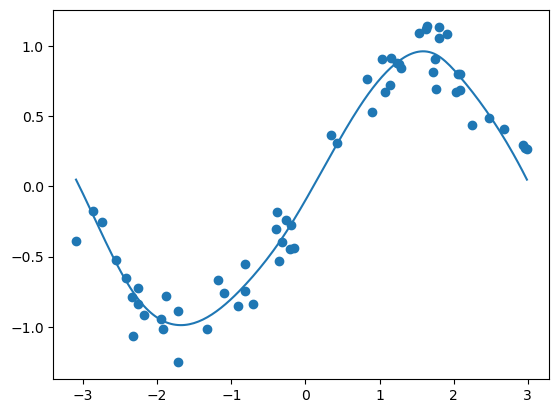

In [ ]:

fitted_gam = gam(
    dependent="y",
    independent=(Smooth("x", bs=CubicSpline(cyclic=True)),),
    data=data,
)

x_linspace = np.linspace(np.min(x), np.max(x), 200)
y_hat = fitted_gam.predict(pd.DataFrame({"x": x_linspace}))

plt.scatter(x, y)
plt.plot(x_linspace, y_hat)

In [11]:
print(fitted_gam.summary())


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 0.001645   0.014144   0.116    0.908

Approximate significance of smooth terms:
       edf Ref.df     F p-value    
s(x) 6.537  7.678 393.9  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.938   Deviance explained = 94.1%
GCV = 0.041577  Scale est. = 0.04001   n = 200
